In [90]:
import numpy as np


---
1. a)

In [91]:
X = np.array(   [[-3, -6, -6, 1, 3, 1, 4],
                 [0, 0, 2, -3, 0, -3, -3]])

y = np.array([0, 0, 0, 1, 1, 1, 1])

print(X.shape)
print(y.shape)

(2, 7)
(7,)


In [92]:
X0 = X[:, y==0] # Amostras da classe 0
X1 = X[:, y==1] # Amostras da classe 1

# Matriz de covariancia das classes 0 e 1
cov0 = np.cov(X0)
cov1 = np.cov(X1)
print("Covariância Classe 0: \n", cov0)
print("\nCovariância Classe 1: \n", cov1)

# Média das classes 0 e 1
m0 = np.mean(X0, axis=1)
m1 = np.mean(X1, axis=1)
print("\nMédia Classe 0: ", m0)
print("Média Classe 1: ", m1)

prod_cov1_m0 = np.dot(cov1, m0)
prod_cov1_m1 = np.dot(cov1, m1)

print("Produto Covariância 1 e média 0: \n", prod_cov1_m0)
print("\nProduto Covariância 1 e média 1: \n", prod_cov1_m1)



Covariância Classe 0: 
 [[ 3.         -1.        ]
 [-1.          1.33333333]]

Covariância Classe 1: 
 [[2.25 0.75]
 [0.75 2.25]]

Média Classe 0:  [-5.          0.66666667]
Média Classe 1:  [ 2.25 -2.25]
Produto Covariância 1 e média 0: 
 [-10.75  -2.25]

Produto Covariância 1 e média 1: 
 [ 3.375 -3.375]


---
1. b)

In [93]:
#print(X0)

print('Produto Matricial $X_0$ por $X_0 ^T$: \n', np.dot(X0, X0.T))

print ('Matriz Covariancia Classe 0: \n', cov0)

Produto Matricial $X_0$ por $X_0 ^T$: 
 [[ 81 -12]
 [-12   4]]
Matriz Covariancia Classe 0: 
 [[ 3.         -1.        ]
 [-1.          1.33333333]]


---
1. c)

In [94]:
x = np.array([[2, 3, 4], [3, 2, 9]]) 
y = np.array([[1, 5, 0], [5, 10, 3]]) 

print("\nInner product of matrices x and y =") 
print(np.inner(x, y))

print(np.dot(x, y.T))


print("\nInner product of matrices m0 and m1 =") 
print(np.inner(m0, m1))
print(np.dot(m0, m1))

print(m1)
print(np.linalg.norm(m1))



Inner product of matrices x and y =
[[17 52]
 [13 62]]
[[17 52]
 [13 62]]

Inner product of matrices m0 and m1 =
-12.75
-12.75
[ 2.25 -2.25]
3.181980515339464


---
2. a)

A:  [[3.75188647 3.03370202]
 [3.03370202 7.2874311 ]]
Média Y:  [ 4.11032184 -0.82651435]
Covariância Y: 
 [[23.97176335 34.23014278]
 [34.23014278 63.42506573]]

Média Y2:  [ 4.0385512  -0.86270543]
Covariância Y2: 
 [[24.2487211  35.02207855]
 [35.02207855 64.94005752]]


(-18.824105811425554, 27.80901744071759, -40.06127361315532, 34.21186745373136)

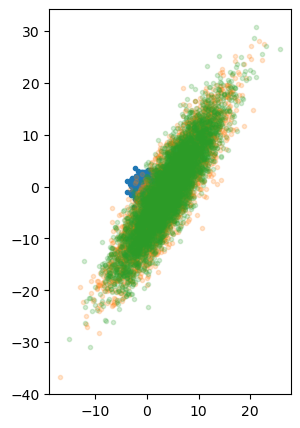

In [102]:
import numpy as np
from scipy.linalg import sqrtm
import matplotlib.pyplot as plt

N = 5000

X = np.random.randn(2, N)

m = np.array([4, -1])
S = np.array([[23.28, 33.49],[33.49, 62.31]])

A = sqrtm(S)
print("A: ", A)
Y = np.dot(A, X) + m[:, np.newaxis]

print("Média Y: ", np.mean(Y, axis=1))
print("Covariância Y: \n", np.cov(Y))


# Opção 2
A = np.array([[4.50, -1.74], [7.83, 1.00]])
m = np.array([4, -1])
Y2 = np.dot(A, X) + m[:, np.newaxis]
print("\nMédia Y2: ", np.mean(Y2, axis=1))
print("Covariância Y2: \n", np.cov(Y2))


plt.figure(figsize=(5, 5))
plt.plot(X[0, :], X[1, :], '.')
plt.plot(Y[0, :], Y[1, :], '.', alpha=0.2)
plt.plot(Y2[0, :], Y2[1, :], '.', alpha=0.2)
plt.axis('scaled')


---
2. b)

In [96]:
print("Convariância de X: \n", np.cov(X))


# Opção 1
Cx=np.cov(X,rowvar=False)

print("\nCovariancia Calculada Opção 1: \n", Cx)
print("Errada!")


# Opção 2
Ctmp=np.mean(X**2,axis=1)
Ctmp=Ctmp[:,np.newaxis]
Cx=np.dot(Ctmp,Ctmp.T)

print("\nCovariancia Calculada Opção 2: \n", Cx)


# Opção 3
mx=np.mean(X,axis=1)
Xn=X-mx[:,np.newaxis]
Ctmp=np.dot(Xn,Xn.T)
Cx=Ctmp/(X.shape[1]-1)

print("\nCovariancia Calculada Opção 3: \n", Cx)


# Opção 4
#mx=np.mean(X,axis=1)
#Xn=X.T-mx[:,np.newaxis] # Broadcast Error
#Ctmp=np.dot(Xn,Xn.T)
#Cx=Ctmp/(X.shape[1]-1)

#print("Covariancia Calculada Opção 4: \n", Cx)


Convariância de X: 
 [[0.27360913 0.01779729]
 [0.01779729 0.522908  ]]

Covariancia Calculada Opção 1: 
 [[ 1.45049806  0.25791509 -0.05363043  0.06043275 -0.54967149]
 [ 0.25791509  0.04586024 -0.0095361   0.01074563 -0.09773786]
 [-0.05363043 -0.0095361   0.00198292 -0.00223443  0.02032344]
 [ 0.06043275  0.01074563 -0.00223443  0.00251784 -0.02290121]
 [-0.54967149 -0.09773786  0.02032344 -0.02290121  0.2083    ]]
Errada!

Covariancia Calculada Opção 2: 
 [[0.049662   0.11848368]
 [0.11848368 0.28267855]]

Covariancia Calculada Opção 3: 
 [[0.27360913 0.01779729]
 [0.01779729 0.522908  ]]


---
3. a)

dict_keys(['trueClass', 'dados'])
(2, 1500)
(1500,)
Classes:  [0. 1. 2.]


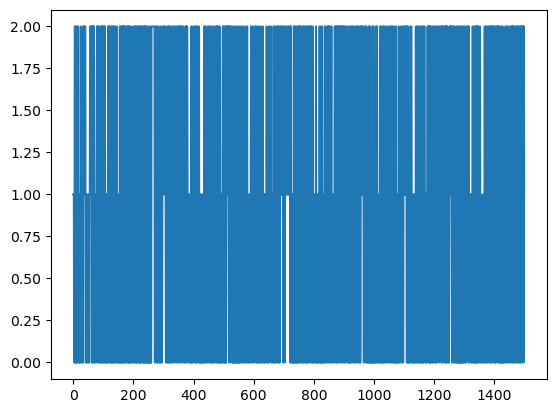

In [97]:
import pickle

fN = '/Users/anaso/Documents/AA/AA-22-23/FichasCasa/Ficha1/A39275_Q003_data.p'
D = pickle.load(open(fN, 'rb'))

print(D.keys())

X = D['dados']
y = D['trueClass']

print(X.shape)
print(y.shape)

print('Classes: ', np.unique(y))

plt.plot(y)


In [98]:
X0 = X[:, y==0]
X1 = X[:, y==1]
X2 = X[:, y==2]

print("Classe 0: ", X0.shape, 
        "| Classe 1: ", X1.shape, 
        "| Classe 2: ", X2.shape)
        
m0 = np.mean(X0, axis=1)
m1 = np.mean(X1, axis=1)
m2 = np.mean(X2, axis=1)

print("Média 0: ", m0, 
        "| Média 1: ", m1, 
        "| Média 2: ", m2)


c0 = np.cov(X0)
c1 = np.cov(X1)
c2 = np.cov(X2)

print("Convariancia 0: \n", c0, 
        "\nConvariancia 1: \n", c1, 
        "\nConvariancia 2: \n", c2)

prod_c1_c2 = np.dot(c1, c2)
det = np.linalg.det(prod_c1_c2)

print("Perguntas:")
print("- Determinante: ", det)

print("- Produto Covariancia 2 e média 2:", np.dot(c2, m2))

print("- Produto interno m0 e m2: ", np.dot(m0, m2))

print("-  Produto Matricial média transposta 1, covariancia 1 e média 2: ", 
        np.dot(np.dot(m1.T, c1), m2)
)

Classe 0:  (2, 600) | Classe 1:  (2, 450) | Classe 2:  (2, 450)
Média 0:  [-2.13320533  6.30662383] | Média 1:  [ 6.99440506e-17 -1.81829860e-16] | Média 2:  [ 4.26677075 -0.01571505]
Convariancia 0: 
 [[ 2.06249886 -0.05464631]
 [-0.05464631  1.99750788]] 
Convariancia 1: 
 [[ 1.66025198 -0.052005  ]
 [-0.052005    1.34917173]] 
Convariancia 2: 
 [[ 2.67258807 -0.58076922]
 [-0.58076922  2.27778958]]
Perguntas:
- Determinante:  12.864919942611058
- Produto Covariancia 2 e média 2: [11.41244741 -2.51380471]
- Produto interno m0 e m2:  -9.201007044883676
-  Produto Matricial média transposta 1, covariancia 1 e média 2:  5.397369011280217e-16


---
3. b)

In [99]:
print("Perguntas:")
print("- Média Classe 2: ", m2)

print("- Média Classe 0: ", m0)

Perguntas:
- Média Classe 2:  [ 4.26677075 -0.01571505]
- Média Classe 0:  [-2.13320533  6.30662383]


---
3. c)

In [100]:
print("Perguntas:")
print(X.shape)
print(X1.shape)

prob = X1.shape[1]/X.shape[1]

print("- Probabilidade à priori Classe 1: ", prob)

print("- Covariancia Classe 2: \n", c2)

Perguntas:
(2, 1500)
(2, 450)
- Probabilidade à priori Classe 1:  0.3
- Covariancia Classe 2: 
 [[ 2.67258807 -0.58076922]
 [-0.58076922  2.27778958]]


---
3. d)

In [101]:
print("Perguntas:")

print("- Média dos dados: ", np.mean(X, axis=1))

print("- Covariancia dos dados: \n", np.cov(X))

Perguntas:
- Média dos dados:  [0.42674909 2.51793502]
- Covariancia dos dados: 
 [[ 9.22644996 -6.69166529]
 [-6.69166529 11.46046121]]
